# Data Visualization


## Objectives


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [45]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-08-30 20:22:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.4’

m4_survey_data.sqli 100%[===================>]  34.98M  31.6MB/s    in 1.1s    

2023-08-30 20:22:47 (31.6 MB/s) - ‘m4_survey_data.sqlite.4’ saved [36679680/36679680]



Connect to the database.


In [46]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [47]:
import pandas as pd

## Demo: How to run an sql query


In [48]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [49]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [50]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [51]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


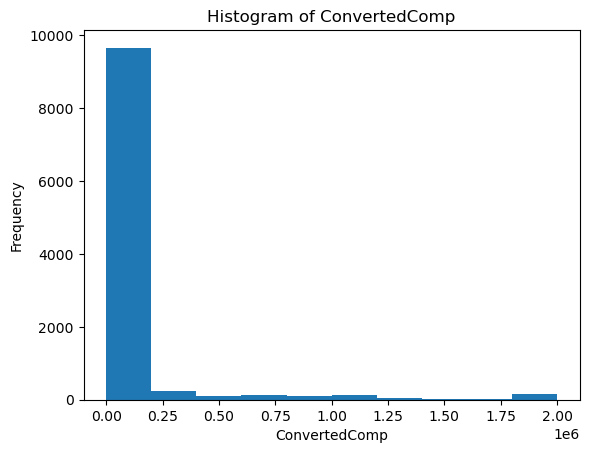

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


# Execute SQL query and read into DataFrame
QUERY = "SELECT ConvertedComp FROM master;"
df = pd.read_sql_query(QUERY, conn)

# Plot histogram
plt.hist(df['ConvertedComp'])
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.title('Histogram of ConvertedComp')
plt.show()

### Box Plots


Plot a box plot of `Age.`


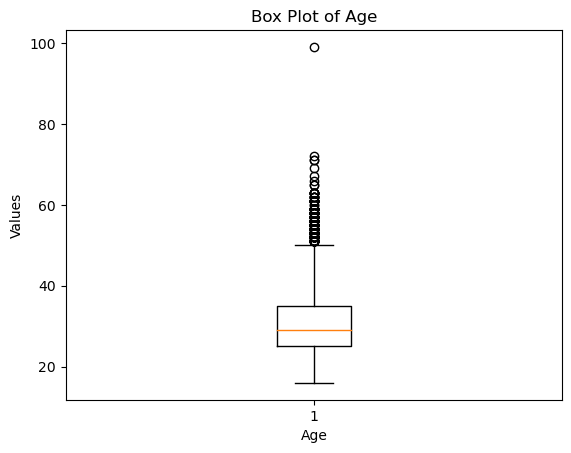

In [53]:
# Execute SQL query and read into DataFrame
QUERY = "SELECT Age FROM master;"
df = pd.read_sql_query(QUERY, conn)

# Drop NaN values
df.dropna(subset=['Age'], inplace=True)

# Create box plot
plt.boxplot(df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


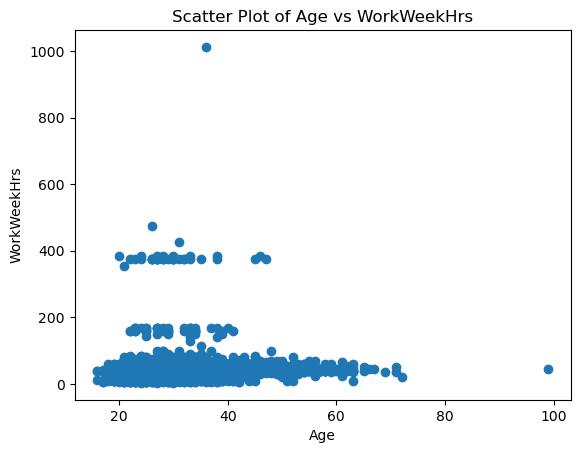

In [54]:
# Execute SQL query to get data
QUERY = "SELECT Age, WorkWeekHrs FROM master;"
df = pd.read_sql_query(QUERY, conn)

# Drop NaN values
df.dropna(subset=['Age', 'WorkWeekHrs'], inplace=True)

# Create scatter plot
plt.scatter(df['Age'], df['WorkWeekHrs'])
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


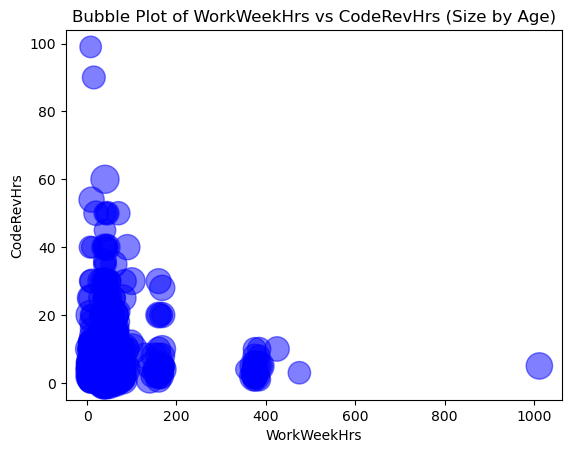

In [55]:
# Fetch data
QUERY = "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master;"
df = pd.read_sql_query(QUERY, conn)

# Remove NaN values
df.dropna(subset=['WorkWeekHrs', 'CodeRevHrs', 'Age'], inplace=True)

# Create bubble plot
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], c='blue', alpha=0.5, s=df['Age']*10)
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs (Size by Age)')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


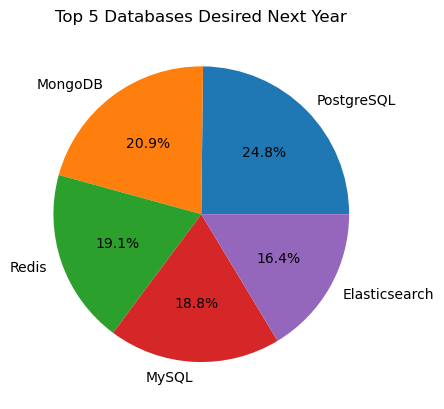

In [78]:
# Corrected SQL query
QUERY = "SELECT DatabaseDesireNextYear FROM DatabaseDesireNextYear;"
df = pd.read_sql_query(QUERY, conn)

# Count the frequency of each database
db_counts = df['DatabaseDesireNextYear'].value_counts()

# Get top 5 databases
top5_dbs = db_counts.nlargest(5)

# Create the pie chart
plt.pie(top5_dbs, labels=top5_dbs.index, autopct='%1.1f%%')
plt.title('Top 5 Databases Desired Next Year')
plt.show()

In [75]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print(tables)


                      name
0                 EduOther
1                  DevType
2                  LastInt
3               JobFactors
4                 WorkPlan
5            WorkChallenge
6       LanguageWorkedWith
7   LanguageDesireNextYear
8       DatabaseWorkedWith
9   DatabaseDesireNextYear
10      PlatformWorkedWith
11  PlatformDesireNextYear
12      WebFrameWorkedWith
13  WebFrameDesireNextYear
14      MiscTechWorkedWith
15  MiscTechDesireNextYear
16              DevEnviron
17              Containers
18               SOVisitTo
19            SONewContent
20                  Gender
21               Sexuality
22               Ethnicity
23                  master


In [87]:
#list the most popular languages that respondents wish to learn lext year.
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*) as Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Count DESC;
"""

df = pd.read_sql_query(QUERY, conn)
print(df)


   LanguageDesireNextYear  Count
0              JavaScript   6630
1                HTML/CSS   5328
2                  Python   5239
3                     SQL   5012
4              TypeScript   4088
5                      C#   3591
6   Bash/Shell/PowerShell   3097
7                    Java   2953
8                      Go   2759
9                  Kotlin   1890
10                    C++   1633
11                   Rust   1520
12                    PHP   1457
13            WebAssembly   1397
14                  Swift   1179
15                   Ruby   1029
16                      C   1028
17                  Scala    879
18                      R    850
19              Other(s):    836
20                     F#    621
21                 Elixir    620
22                   Dart    610
23                Clojure    413
24               Assembly    336
25            Objective-C    310
26                 Erlang    310
27                    VBA    149


In [88]:
#number of respondents that indicated that they currenlty work with 'SQL'
QUERY = """
SELECT COUNT(*) as NumPeople
FROM LanguageWorkedWith
WHERE LanguageWorkedWith = 'SQL';
"""

df = pd.read_sql_query(QUERY, conn)
print(df)


   NumPeople
0       7106


In [99]:
QUERY = """
SELECT COUNT(*) as NumRespondents
FROM DatabaseWorkedWith
WHERE DatabaseWorkedWith = 'MySQL'
AND PersonID NOT IN (
    SELECT PersonID
    FROM DatabaseWorkedWith
    WHERE DatabaseWorkedWith <> 'MySQL'
);
"""

df = pd.read_sql_query(QUERY, conn)
print(df)


DatabaseError: Execution failed on sql '
SELECT COUNT(*) as NumRespondents
FROM DatabaseWorkedWith
WHERE DatabaseWorkedWith = 'MySQL'
AND PersonID NOT IN (
    SELECT PersonID
    FROM DatabaseWorkedWith
    WHERE DatabaseWorkedWith <> 'MySQL'
);
': no such column: PersonID

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [69]:
column_names = ["WorkWeekHrs", "CodeRevHrs", "Age"]  # Add your column names here
like_clauses = [f"sql LIKE '%{col}%'" for col in column_names]
joined_clauses = " AND ".join(like_clauses)

query = f"SELECT name FROM sqlite_master WHERE type='table' AND {joined_clauses};"
matching_tables = pd.read_sql_query(query, conn)

print("Tables containing the columns:", matching_tables['name'])


Tables containing the columns: 0    master
Name: name, dtype: object


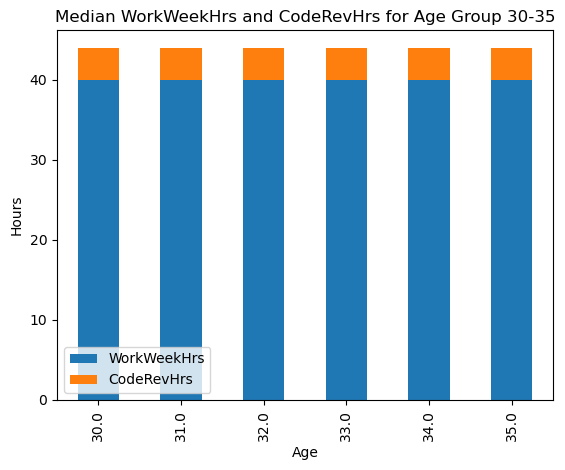

In [71]:
# SQL query to fetch data
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35;
"""

# Fetch data
df_raw = pd.read_sql_query(QUERY, conn)

# Group by age and calculate median
df_median = df_raw.groupby('Age').agg({'WorkWeekHrs': 'median', 'CodeRevHrs': 'median'}).reset_index()

# Plotting
ax = df_median.plot(x='Age', y=['WorkWeekHrs', 'CodeRevHrs'], kind='bar', stacked=True)
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


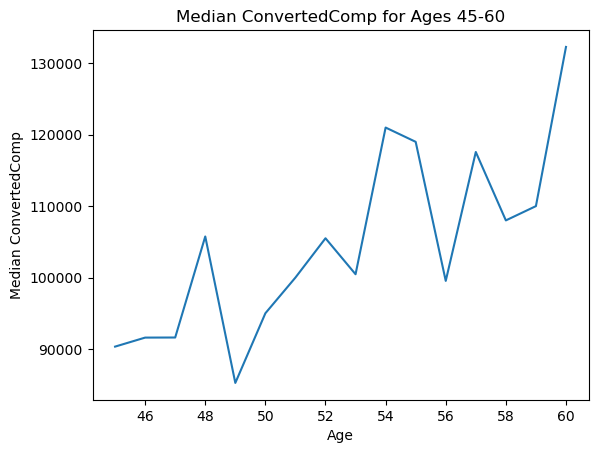

In [72]:
# Fetch data using SQL
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60;
"""

df_raw = pd.read_sql_query(QUERY, conn)

# Group by Age and find the median for ConvertedComp
df_median = df_raw.groupby('Age')['ConvertedComp'].median().reset_index()

# Plotting the line chart
plt.plot(df_median['Age'], df_median['ConvertedComp'])
plt.title('Median ConvertedComp for Ages 45-60')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.show()




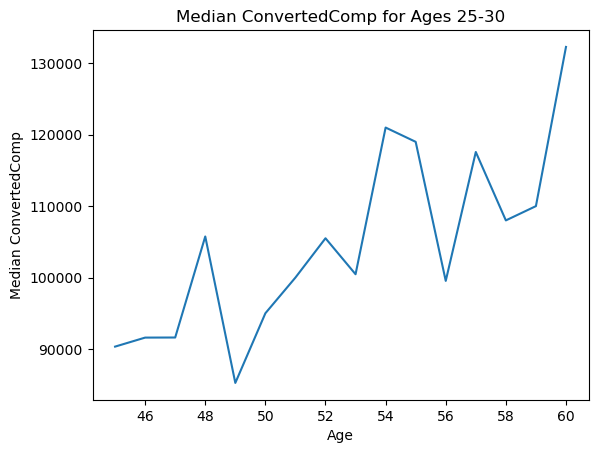

In [102]:
# Fetch data using SQL
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 25 AND 30;
"""

df_raw_2 = pd.read_sql_query(QUERY, conn)

# Group by Age and find the median for ConvertedComp
df_median = df_raw.groupby('Age')['ConvertedComp'].median().reset_index()

# Plotting the line chart
plt.plot(df_median['Age'], df_median['ConvertedComp'])
plt.title('Median ConvertedComp for Ages 25-30')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


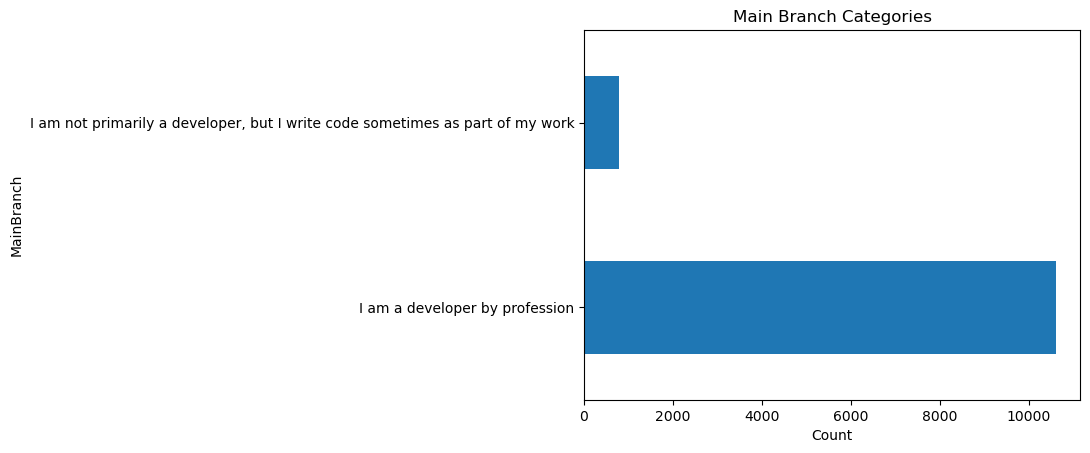

In [73]:
# SQL Query to fetch the data
QUERY = "SELECT MainBranch FROM master;"

# Fetch data
df_mainbranch = pd.read_sql_query(QUERY, conn)

# Count frequencies of each MainBranch
mainbranch_counts = df_mainbranch['MainBranch'].value_counts()

# Create horizontal bar chart
mainbranch_counts.plot(kind='barh')
plt.title('Main Branch Categories')
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.show()

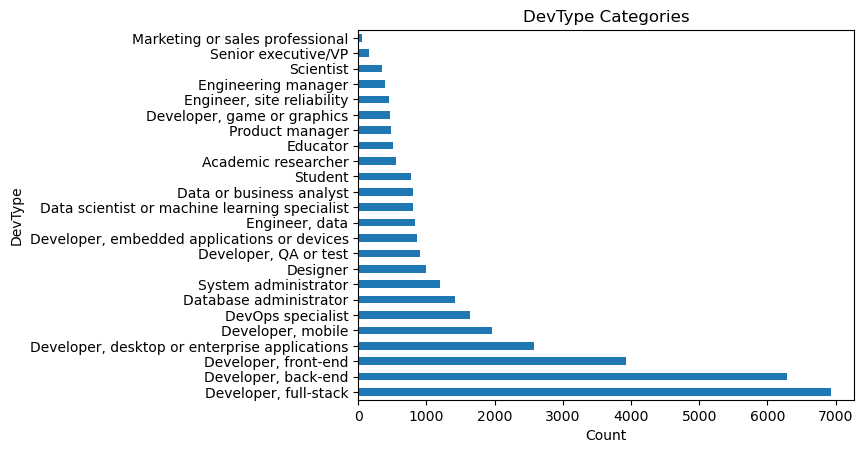

In [101]:
# SQL Query to fetch the data
QUERY = "SELECT DevType FROM DevType;"

# Fetch data
df_devType = pd.read_sql_query(QUERY, conn)

# Count frequencies of each MainBranch
devType_counts = df_devType['DevType'].value_counts()

# Create horizontal bar chart
devType_counts.plot(kind='barh')
plt.title('DevType Categories')
plt.xlabel('Count')
plt.ylabel('DevType')
plt.show()

Close the database connection.


In [ ]:
conn.close()